# Определение перспективного тарифа для телеком-компании

**Описание исследования:**

Клиентам компании «Мегалайн» предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br>

**Цель исследования:**

* Выполнить предварительный анализ тарифов на небольшой выборке клиентов - 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
* Проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
***

**Описание тарифов**

*Тариф «Смарт»*
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 
    * минута разговора: 3 рубля; 
    * сообщение: 3 рубля; 
    * 1 Гб интернет-трафика: 200 рублей.

*Тариф «Ультра»*
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 
    * минута разговора: 1 рубль; 
    * сообщение: 1 рубль; 
    * 1 Гб интернет-трафика: 150 рублей.

**Примечание:** 

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
***

## Изучение данных из файла

Данные содержатся в пяти файлах:
* *users* (информация о пользователях)
* *calls* (информация о звонках)
* *messages* (информация о сообщениях)
* *internet* (информация об интернет-сессиях)
* *tariffs* (информация о тарифах)

Последовательно изучим данные из каждого файла.

In [1]:
#импорт необходимых для работы библиотек
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from scipy import stats as st

In [2]:
# применим метод set_option для отображения всех столбцов
pd.set_option('mode.chained_assignment', None)

### Таблица *users*

In [3]:
# загрузим первые три строки файла users
try:
    users = pd.read_csv('/datasets/users.csv', nrows = 3)
except:
    users = pd.read_csv('users.csv', nrows = 3)
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


Данные отображены верно, загрузим всю таблицу.

In [4]:
try:
    users = pd.read_csv('/datasets/users.csv')
except:
    users = pd.read_csv('users.csv')

Проверим общую информацию о таблице *users*.

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице есть 8 столбцов. Согласно документации к данным:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

Нарушений стиля в названиях столбцов нет.<br>
Столбец `reg_date` нужно привести к временному типу данных. <br>
Есть пропуски в столбце `churn_date`, но как сказано в документации: если значение пропущено, то тариф ещё действовал на момент выгрузки данных.

### Таблица *calls*

In [6]:
# загрузим первые три строки файла calls
try:
    calls = pd.read_csv('/datasets/calls.csv', nrows = 3)
except:
    calls = pd.read_csv('calls.csv', nrows = 3)
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


Данные отображены верно, загрузим всю таблицу.

In [7]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
except:
    calls = pd.read_csv('calls.csv')

Проверим общую информацию о таблице *calls*.

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице есть 4 столбца. Согласно документации к данным:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Нарушений стиля в названиях столбцов нет.<br>
Столбец `call_date` нужно привести к временному типу данных.<br>
Пропусков нет.

### Таблица *messages*

In [9]:
# загрузим первые три строки файла messages
try:
    messages = pd.read_csv('/datasets/messages.csv', nrows = 3)
except:
    messages = pd.read_csv('messages.csv', nrows = 3)
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


Данные отображены верно, загрузим всю таблицу.

In [10]:
try:
    messages = pd.read_csv('/datasets/messages.csv')
except:
    messages = pd.read_csv('messages.csv')

Проверим общую информацию о таблице *messages*

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице есть 3 столбца. Согласно документации к данным:
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Нарушений стиля в названиях столбцов нет. <br>
Столбец `message_date` нужно привести к временному типу данных.<br>
Пропусков нет.

### Таблица *internet*

In [12]:
# загрузим первые три строки файла internet
try:
    internet = pd.read_csv('/datasets/internet.csv', nrows = 3)
except:
    internet = pd.read_csv('internet.csv', nrows = 3)
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


Данные отображены верно, но содержат лишний столбец `Unnamed: 0`. Загрузим всю таблицу, но без этого столбца.

In [13]:
# загрузим первые три строки файла internet
try:
    internet = pd.read_csv('/datasets/internet.csv', index_col=0)
except:
    internet = pd.read_csv('internet.csv', index_col=0)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Проверим общую информацию о таблице *internet*

In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


В таблице есть 5 столбцов. Согласно документации к данным:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Нарушений стиля в названиях столбцов нет. <br>
Столбец `session_date` нужно привести к временному типу данных.<br>
Пропусков нет.

### Таблица *tariffs*

In [15]:
# загрузим первые три строки файла tariffs
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv', nrows = 3)
except:
    tariffs = pd.read_csv('tariffs.csv', nrows = 3)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Данные отображены верно, загрузим всю таблицу.

In [16]:
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except:
    tariffs = pd.read_csv('tariffs.csv')

Проверим общую информацию о таблице `tariffs`

In [17]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице есть 8 столбцов. Согласно документации к данным:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included`— количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Нарушений стиля в названиях столбцов нет.<br>
Пропусков нет.

### Вывод

* Данные таблиц изучены.
* Нарушений стиля в названиях столбцов не найдено.
* Пропусков нет.
* Некоторые столбцы нужно привести к верному типу данных.

## Предобработка данных

Необходимо провести замену типов данных, а также произвести следующие расчеты для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### Замена типов данных

Изменим тип данных на временной в следующих столбцах:
* `reg_date` таблицы *users*
* `call_date` таблицы *calls*
* `message_date` таблицы *messages*
* `session_date` таблицы *internet*

In [18]:
#reg_date таблицы users
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d' )
print(users['reg_date'].dtype)

#call_date таблицы calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d' )
print(calls['call_date'].dtype)

#message_date таблицы messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d' )
print(messages['message_date'].dtype)

#session_date таблицы internet
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d' )
print(internet['session_date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


### Количество сделанных звонков и израсходованных минут разговора по месяцам

Создадим столбец с месяцем в таблице *calls*

In [19]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Теперь создадим сводную таблицу для подсчета сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя.

In [20]:
#округлим все звонки в большую сторону в таблице calls
calls['duration'] = np.ceil(calls['duration'])
# создаем сводную таблицу
calls_users = calls.pivot_table(index=['user_id', 'month'], 
                                values='duration', 
                                aggfunc=['sum', 'count']
                               )
# сделаем замену названий столбцов
calls_users.columns=['spent_minutes', 'number_of_calls']
calls_users.sample(5)

,,spent_minutes,number_of_calls
user_id,month,,
1272,8,20.0,4
1026,11,469.0,61
1169,6,72.0,7
1466,9,482.0,63
1199,9,434.0,64


### Количество отправленных сообщений по месяцам

In [21]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [22]:
messages_users = messages.pivot_table(index=['user_id', 'month'], 
                                      values='id', 
                                      aggfunc='count'
                                     )
messages_users.columns=['number_of_messages']
messages_users

number_of_messages
user_id month                    
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57
...                           ...
1498    10                     42
1499    9                      11
        10                     48
        11                     59
        12                     66

[2717 rows x 1 columns]

### объем израсходованного интернет-трафика по месяцам

In [23]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [24]:
internet_users = internet.pivot_table(index=['user_id', 'month'], 
                                      values='mb_used', 
                                      aggfunc='sum'
                                     )
internet_users.columns=['mb_used']
internet_users['mb_used'] = internet_users['mb_used'].apply(math.ceil)
internet_users

mb_used
user_id month         
1000    5         2254
        6        23234
        7        14004
        8        14056
        9        14569
...                ...
1498    10       20580
1499    9         1846
        10       17789
        11       17964
        12       13056

[3203 rows x 1 columns]

### Помесячная выручка с каждого пользователя

Сгруппируем данные по пользователям и получим тарифы, которыми каждый из них пользуется.

In [25]:
tariff_users = users.groupby('user_id')['tariff'].first()
tariff_users

user_id
1000    ultra
1001    smart
1002    smart
1003    ultra
1004    ultra
        ...  
1495    ultra
1496    smart
1497    smart
1498    smart
1499    smart
Name: tariff, Length: 500, dtype: object

Объединим полученные таблицы 

In [26]:
total_users = calls_users.join([messages_users, internet_users], how='outer')
total_users = total_users.astype('Int64')
total_users = total_users.join(tariff_users, how='outer')
total_users = total_users.fillna(0)
total_users.sample(5)

,,spent_minutes,number_of_calls,number_of_messages,mb_used,tariff
user_id,month,,,,,
1439,7,329,55,5,20040,smart
1368,12,403,55,89,20476,smart
1408,7,525,82,1,12438,smart
1055,12,597,83,39,22833,smart
1002,6,117,15,4,10857,smart


Теперь расчитаем выручку с каждого пользователя по месяцам.

In [27]:
def proceeds(row):
    
    if row['tariff'] == 'ultra':
        proceeds = 1950
        proceeds += (row['spent_minutes'] - tariffs.loc[1, 'minutes_included']).clip(0) * tariffs.loc[1, 'rub_per_minute']
        proceeds += (row['number_of_messages'] - tariffs.loc[1, 'messages_included']).clip(0) * tariffs.loc[1, 'rub_per_message']    
        proceeds += (np.ceil((row['mb_used'] - tariffs.loc[1, 'mb_per_month_included']) / 1024)).clip(0) * tariffs.loc[1, 'rub_per_gb']
        return proceeds
    
    if row['tariff'] == 'smart':
        proceeds = 550
        proceeds += (row['spent_minutes'] - tariffs.loc[0, 'minutes_included']).clip(0) * tariffs.loc[0, 'rub_per_minute']
        proceeds += (row['number_of_messages'] - tariffs.loc[0, 'messages_included']).clip(0) * tariffs.loc[0, 'rub_per_message']    
        proceeds += (np.ceil((row['mb_used'] - tariffs.loc[0, 'mb_per_month_included']) / 1024)).clip(0) * tariffs.loc[0, 'rub_per_gb']
        return proceeds
    
total_users['proceeds'] = total_users.apply(proceeds, axis=1)
total_users.sample(5)    

,,spent_minutes,number_of_calls,number_of_messages,mb_used,tariff,proceeds
user_id,month,,,,,,
1000,6,172,43,60,23234,ultra,1950.0
1077,11,686,97,36,18982,smart,1908.0
1249,9,226,33,14,11609,smart,550.0
1130,6,648,79,69,17858,smart,1651.0
1311,10,316,52,67,15330,smart,601.0


### Вывод

В данном разделе была проведена замена типов данных, а также произведены следующие расчеты для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Полученные данные объеденены в таблицу.

## Анализ данных

Необходимо описать какое количество минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

### Анализ параметра "Количество минут"

Статистики для объема потраченных минут по месяцам для тарифа "Смарт":
Среднее: 418
Дисперсия: 36219
Стандартное отклонение: 190

Статистики для объема потраченных минут по месяцам для тарифа "Ультра":
Среднее: 527
Дисперсия: 100874
Стандартное отклонение: 318


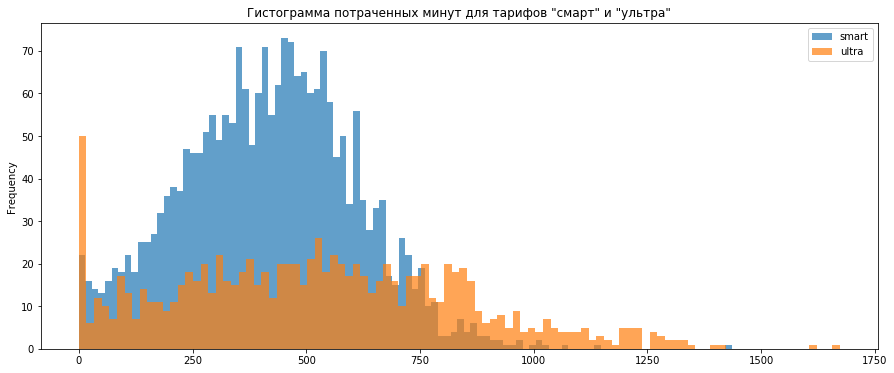

In [40]:
# растчет количества потраченных минут по тарифам
minutes_smart = total_users[total_users['tariff'] == 'smart']['spent_minutes']
minutes_ultra = total_users[total_users['tariff'] == 'ultra']['spent_minutes']
# вывод среднего, дисперсии, и стандратного отклонения для каждого тарифа
print('''Статистики для объема потраченных минут по месяцам для тарифа "Смарт":
Среднее: {:.0f}
Дисперсия: {:.0f}
Стандартное отклонение: {:.0f}'''.format(minutes_smart.mean(), minutes_smart.var(), minutes_smart.std()))
print()
print('''Статистики для объема потраченных минут по месяцам для тарифа "Ультра":
Среднее: {:.0f}
Дисперсия: {:.0f}
Стандартное отклонение: {:.0f}'''.format(minutes_ultra.mean(), minutes_ultra.var(), minutes_ultra.std()))
# посторение гистограммы
total_users.groupby('tariff')['spent_minutes'].plot(kind='hist', 
                                              bins=100, 
                                              alpha=0.7, 
                                              figsize=(15, 6),
                                              legend=True)

plt.title('Гистограмма потраченных минут для тарифов "смарт" и "ультра"')
plt.show()

Некоторое количество клиентов не тратят минуты разоговора.

Клиенты тарифа "Ультра"  в среднем тратят больше минут разговора. При этом эти клиенты сильнее отличаются друг от друга по данному параметру. Об этом говорит как большее стандартное отклонение, так и более широкое распределение значений на гистограмме, которое к тому же сложно назвать нормальным - большинство значений лежат в диапазоне от 0 до 800 минут, но они не образуют "колокол", а распределены относительно равномерно.

Поведение клиентов тарифа "Смарт" иное. Различие клиентов не столь выраженное. Распределение значений - нормальное, в диапазоне от 0 до 800 минут.

Также видно, что клиентов тарифа "Ультра", которые бы тратили минуты сверх тарифного пакета нет (> 3000 минут). А вот клиенты тарифа "Смарт" иногда пользуются данной функцией (> 500 минут)
***

### Анализ параметра "Количество сообщений"

Статистики для объема отправленных сообщений по месяцам для тарифа "Смарт":
среднее: 33
Дисперсия: 797
Стандартное отклонение: 28

Статистики для объема отправленных сообщений по месяцам для тарифа "Ультра":
среднее: 49
Дисперсия: 2285
Стандартное отклонение: 48


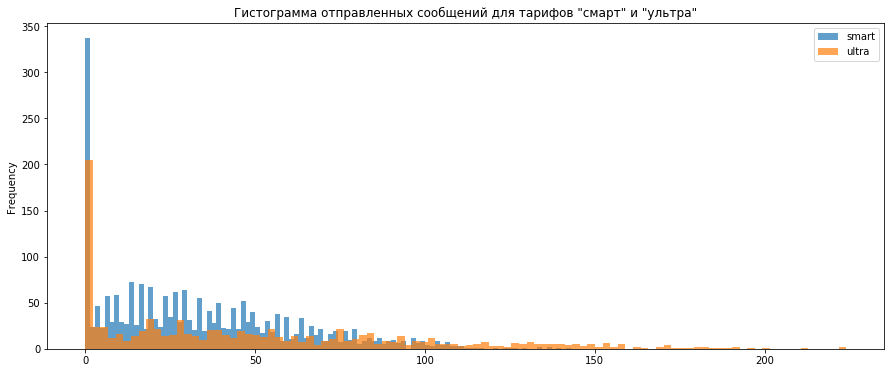

In [42]:
messages_smart = total_users[total_users['tariff'] == 'smart']['number_of_messages']
messages_ultra = total_users[total_users['tariff'] == 'ultra']['number_of_messages']
print('''Статистики для объема отправленных сообщений по месяцам для тарифа "Смарт":
среднее: {:.0f}
Дисперсия: {:.0f}
Стандартное отклонение: {:.0f}'''.format(messages_smart.mean(), messages_smart.var(), messages_smart.std()))
print()
print('''Статистики для объема отправленных сообщений по месяцам для тарифа "Ультра":
среднее: {:.0f}
Дисперсия: {:.0f}
Стандартное отклонение: {:.0f}'''.format(messages_ultra.mean(), messages_ultra.var(), messages_ultra.std()))
total_users.groupby('tariff')['number_of_messages'].plot(kind='hist', 
                                              bins=100, 
                                              alpha=0.7, 
                                              figsize=(15, 6),
                                              legend=True)
plt.title('Гистограмма отправленных сообщений для тарифов "смарт" и "ультра"')
plt.show()

Многие клиенты не отправляют сообщения. Посмотрим на данные без нулевых значений

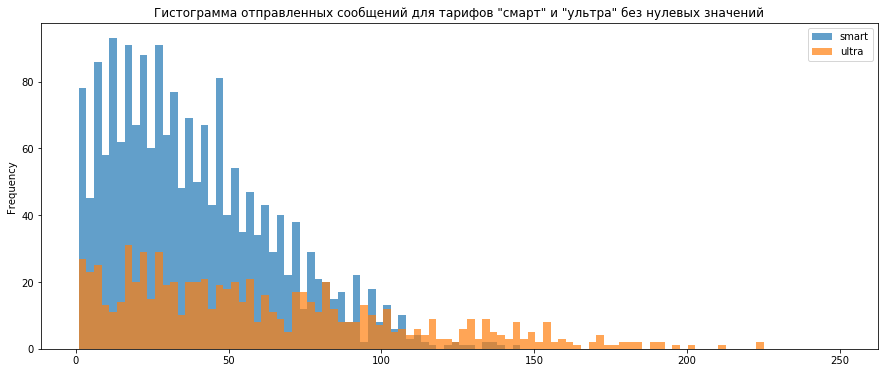

In [45]:
total_users.groupby('tariff')['number_of_messages'].plot(kind='hist', 
                                                         bins=100, 
                                                         alpha=0.7, 
                                                         figsize=(15, 6), 
                                                         range=(1,250),
                                                         legend=True
                                                        )
plt.title('Гистограмма отправленных сообщений для тарифов "смарт" и "ультра" без нулевых значений')
plt.show()

Клиенты тарифа "Ультра" в среднем отправляют больше сообщений в месяц. Обе гистограммы имеют положительную скошенность. Практически все клиенты тарифа "Смарт" тратят не больше ста сообщений в месяц. Большинство клиентов тарифа "Ультра" также тратят не больше ста сообщений в месяц, но значений больше ста немало.

Также видно, что клиентов тарифа "Ультра", которые бы тратили сообщения сверх тарифного пакета нет (>1000). А вот клиенты тарифа "Смарт" иногда пользуются такой услугой(> 50).
***

### Анализ параметра "объем интернет-трафика"

Статистики для объема израсходованного интернет-трафика по месяцам для тарифа "Смарт":
среднее: 16209
Дисперсия: 34462563
Стандартное отклонение: 5870

Статистики для объема израсходованного интернет-трафика по месяцам для тарифа "Ультра":
среднее: 19469
Дисперсия: 101751558
Стандартное отклонение: 10087


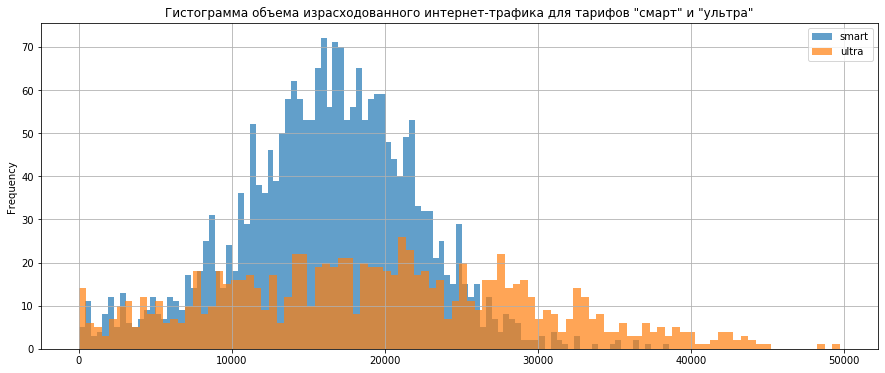

In [46]:
mb_smart = total_users[total_users['tariff'] == 'smart']['mb_used']
mb_ultra = total_users[total_users['tariff'] == 'ultra']['mb_used']
print('''Статистики для объема израсходованного интернет-трафика по месяцам для тарифа "Смарт":
среднее: {:.0f}
Дисперсия: {:.0f}
Стандартное отклонение: {:.0f}'''.format(mb_smart.mean(), mb_smart.var(), mb_smart.std()))
print()
print('''Статистики для объема израсходованного интернет-трафика по месяцам для тарифа "Ультра":
среднее: {:.0f}
Дисперсия: {:.0f}
Стандартное отклонение: {:.0f}'''.format(mb_ultra.mean(), mb_ultra.var(), mb_ultra.std()))
total_users.groupby('tariff')['mb_used'].plot(kind='hist', 
                                              bins=100, 
                                              alpha=0.7, 
                                              figsize=(15, 6), 
                                              grid=True,
                                              legend=True)
plt.title('Гистограмма объема израсходованного интернет-трафика для тарифов "смарт" и "ультра"')
plt.show()

Клиенты тарифа "Ультра" в среднем тратят больше интернет-трафика. При этом эти клиенты сильнее отличаются друг от друга по данному параметру. Об этом говорит как большее стандартное отклонение, так и более широкое распределение значений на гистограмме. 

Поведение клиентов тарифа "Смарт" иное. Различие клиентов не столь выраженное. Распределение значений - нормальное.

Клиенты тарифа "Ультра" не часто тратят интернет-трафик сверх тарифного пакета. Клиенты тарифа "Смарт" покупают дополнительный трафик больше чем в половине случаев.
***

### Вывод

Замена типов данных прошла успешно.

Построенные гистограммы позволяют сделать вывод, что клиенты тарифа "Ультра" в среднем используют услуги в большем количестве, но при этом редко превышают тарифный пакет. 

## Проверка гипотез

Нужно проверить гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Генеральную совокупность из клиентов можно представить в виде двух генеральных совокупностей: клиенты тарифа "Смарт" и клиенты тарифа "Ультра". Значит предоставленную выборку можно разделить по тому же принципу, тем самым получив две выборки, которые можно считать случайными выборками из двух генеральных совокупностей и проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Нулевая гипотеза: $Н_{0}$ - средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы.<br>
Альтернативная гипотеза: $Н_{1}$ - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Получим из таблицы *total_user* выручку отдельно для каждого тарифа.

In [32]:
proceeds_ultra = total_users[total_users['tariff'] == 'ultra']['proceeds']
proceeds_smart = total_users[total_users['tariff'] == 'smart']['proceeds']

С помощью специального метода *ttest_ind* из библиотеки *scipy* проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Уровень значимости (α) примем равным 0.05. Также будем считать, что дисперсии выборок не равны в виду различного поведения клиентов разных тарифов.

In [33]:
hypothesis_1 = st.ttest_ind(
    proceeds_ultra, 
    proceeds_smart, 
    equal_var = False)
    
alpha=0.05

print('p-значение: ', hypothesis_1.pvalue)

if hypothesis_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Полученный результат говорит о том, что средняя выручка по тарифам различна, причем достаточно сильно. 

Солгасно заданию нужно найти какой тариф лучше, т.е. приносит больше денег. Т.к гипотеза о равенстве средних выручек двух тарифов опровергнута, нужно выдвинуть другую гипотезу: один тариф приносит больше денег чем другой.

Нулевая гипотеза: $Н_{0}$ - средняя выручка пользователей тарифа «Ультра» больше чем тарифа «Смарт».<br>
Альтернативная гипотеза: $Н_{1}$ - средняя выручка пользователей тарифа «Ультра» меньше чем тарифа «Смарт».

In [34]:
hypothesis_2 = st.ttest_ind(
    proceeds_ultra, 
    proceeds_smart, 
    equal_var = False)
    
alpha=0.05

print('p-значение: ', hypothesis_2.pvalue/2)

if hypothesis_2.pvalue/2 < alpha and proceeds_ultra.mean() < proceeds_smart.mean():
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.1303156965538042e-250
Не получилось отвергнуть нулевую гипотезу


Полученные данные не противоречат гипотезе - средняя выручка пользователей тарифа «Ультра» больше чем тарифа «Смарт». Значит можно принять данную гипотезу.
***

### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Как и прошлом пункте генеральную совокупность из клиентов можно представить в виде двух генеральных совокупностей: клиенты из Москвы и клиенты из других регионов. Значит предоставленную выборку можно разделить по тому же принципу, тем самым получив две выборки, которые можно считать случайными выборками из двух генеральных совокупностей и проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Создадим таблицу с пользователем, средней выручкой и городом.

In [35]:
city = users.groupby('user_id')['city'].first()
users_city = total_users.pivot_table(index='user_id', values='proceeds', aggfunc='sum')
users_city = users_city.join(city)
users_city

,proceeds,city
user_id,,
1000,15600.0,Краснодар
1001,1700.0,Москва
1002,7250.0,Стерлитамак
1003,9750.0,Москва
1004,15600.0,Новокузнецк
...,...,...
1495,11550.0,Иркутск
1496,28351.0,Вологда
1497,2785.0,Челябинск


Теперь разделим данные - Москва и регионы.

In [36]:
moscow = users_city.query('city == "Москва"')
regions = users_city.query('city != "Москва"')

Теперь возьмем данные о выручке.

In [37]:
moscow_proceeds = moscow.proceeds
regions_proceeds = regions.proceeds

Нулевая гипотеза: $Н_{0}$ - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.<br>
Альтернативная гипотеза: $Н_{1}$ - средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

Посмотрим на размеры выборок.

In [38]:
print(f'Жителей Москвы: {len(moscow_proceeds)}')
print(f'Жителей регионов: {len(regions_proceeds)}')

Жителей Москвы: 99
Жителей регионов: 399


Так как выборки разного размера их дисперсии будем считать различными. Уровень значимости (α) примем равным 0.05

In [39]:
hypothesis_3 = st.ttest_ind(
    moscow_proceeds, 
    regions_proceeds, 
    equal_var = False)
    
alpha=0.05

print('p-значение: ', hypothesis_3.pvalue)

if hypothesis_3.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5864727434062591
Не получилось отвергнуть нулевую гипотезу


Полученные данные не противоречат гипотезе - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Значит можно принять данную гипотезу.

### Вывод

Были проверены гипотезы о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт» и о равенстве средней выручки пользователей из Москвы и из других регионов.

В результате проверки гипотез были получены следующие результаты:
* средняя выручка пользователей тарифа «Ультра» больше чем тарифа «Смарт»
* средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

## Общий вывод

**Анализ поведения клиентов тарифов "Ультра" и "Смарт" по следующим параметрам:**

*Поведение клиентов по параметру "потраченные минуты разговора":*
* Клиенты тарифа "Ультра" в среднем тратят больше минут разговора. При этом эти клиенты сильнее отличаются друг от друга по данному параметру.
* Поведение клиентов тарифа "Смарт" иное. Различие клиентов не столь выраженное. Распределение значений - нормальное.
* Клиентов тарифа "Ультра", которые бы тратили минуты сверх тарифного пакета нет. Клиенты тарифа "Смарт" иногда пользуются данной функцией.

*Поведение клиентов по параметру "количество отправленных сообщений":*
* Клиенты тарифа "Ультра" в среднем отправляют больше собщений в месяц. Практически все клиенты тарифа "Смарт" тратят не больше ста сообщений в месяц. Большинство клиентов тарифа "Ультра" также тратят не больше ста сообщений в месяц, но немало и тех, кто тратит больше ста сообщений.
* Клиентов тарифа "Ультра", которые бы тратили сообщения сверх тарифного пакета нет. Клиенты тарифа "Смарт" иногда пользуются такой услугой(> 50).

*Поведение клиентов по параметру "объем интернет-трафика":*
* Клиенты тарифа "Ультра" в среднем тратят больше интернет-трафика. При этом эти клиенты сильнее отличаются друг от друга по данному параметру.
* Поведение клиентов тарифа "Смарт" иное. Различие клиентов не столь выраженное. Распределение значений - нормальное.
* Клиенты тарифа "Ультра" не часто тратят интернет-трафик сверх тарифного пакета. Клиенты тарифа "Смарт" покупают дополнительный трафик больше чем в половине случаев.

**Результаты проверки гипотез:**
* средняя выручка пользователей тарифа «Ультра» больше чем тарифа «Смарт»
* средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

**Общий вывод:**

Несмотря на то, что клиенты тарифа "Смарт" пользуются дополнительными платными услугами по результатам проверки гипотез - в большей степени вероятно что **средняя выручка выше у тарифа "Ультра"**. Это значит, что скорректировать рекламный бюджет стоит в сторону тарифа "Ультра".